# 06 Merging customer data with order and product data

This Script contains:

    01 Import libraries and customer data 
    02 Data wrangling for customers.csv
    03 Quality and consistency checks
    04 Combine customer data with prepared Instacart data
    05 Export merged data frame


## 01 Import libraries and data


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

In [2]:
# Import dataframe
path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis - Kopie'
customers = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'customers.csv'))

## 02 Data wrangling for customers

    Dropping columns
    Renaming columns
    Changing data types

### Dropping columns


In [4]:
customers.shape

(206209, 10)

In [14]:
# Checking the dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [15]:
# Checking the columns
customers.columns 

# No need for dropping columns

Index(['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

### Renaming columns

In [16]:
# Renaming Surnam STATE and First Name
customers.rename(columns={'Surnam' : 'last_name', 'STATE': 'state', 'First Name': 'first_name', 'Gender': 'gender', 'Age': 'age'}, inplace = True)

In [17]:
customers.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


### Changing Data type

In [18]:
# Checking Data types
customers.dtypes

user_id          int64
first_name      object
last_name       object
gender          object
state           object
age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [19]:
# Checking for columns that have mixed type data
for col in customers.columns.tolist():
    weird =( customers[[col]].applymap(type) !=customers[[col]].iloc[0].apply(type)).any(axis=1)
    
    if len (customers[weird])> 0:
        print(col)

first_name


In [20]:
# Changing First names data type into string
customers['first_name'] = customers['first_name'].astype('str')

## 03 Quality and consistency checks


    Missing values
    Consistency checks
    Checking for duplicates

### Missing values

In [21]:
# Check for columns with missing values
customers.columns[customers.isnull().any()]

Index([], dtype='object')

### Consistency checks for each row:

#### gender

In [23]:
# Checking the number of values for gender
customers['gender'].value_counts(dropna = False)

gender
Male      104067
Female    102142
Name: count, dtype: int64

##### Observations for gender
almost equal distribution between men and women 

no missing values

#### state

In [24]:
# Checking for number of unique values
customers['state'].nunique()

51

In [25]:
# Checking the number of values for state
customers['state'].value_counts(dropna=False)

state
Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana 

##### observations for state
51 states including DC

Almost equally distributed

#### age

In [26]:
# Checking age
customers['age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: age, dtype: float64

In [27]:
# Checking the count of values for age
customers['age'].value_counts(dropna= False)

age
19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: count, Length: 64, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

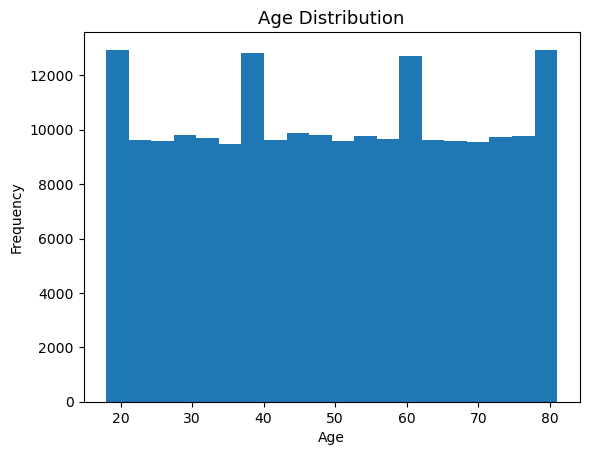

In [29]:
# Checking distribution of age
customers['age'].plot.hist(bins=20, xlabel='Age')
plt.title('Age Distribution', fontsize=13)

##### Observations for age
age between 18 and 81 with an average of 50

equal distribution with 4 peaks

no missing values

#### date_joined

In [30]:
# Checking the latest entry
customers['date_joined'].max()

'9/9/2019'

In [31]:
# Checking the first entry
customers['date_joined'].min()

'1/1/2017'

In [32]:
# Checking mode
customers['date_joined'].mode()

0    9/17/2018
Name: date_joined, dtype: object

In [34]:
# Checking the number of values
customers['date_joined'].value_counts(dropna=False)

date_joined
9/17/2018     213
2/10/2018     212
4/1/2019      211
9/21/2019     211
12/19/2017    210
             ... 
9/1/2018      141
1/22/2018     140
11/24/2017    139
7/18/2019     138
8/6/2018      128
Name: count, Length: 1187, dtype: int64

##### Observations for date_joined

dates between 1/1/2017 and 9/9/2019

no missing values

#### n_dependants

In [35]:
# Checking key figures
customers['n_dependants'].describe()

count    206209.000000
mean          1.499823
std           1.118433
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: n_dependants, dtype: float64

In [37]:
# Counting values
customers['n_dependants'].value_counts(dropna=False)

n_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of dependants')

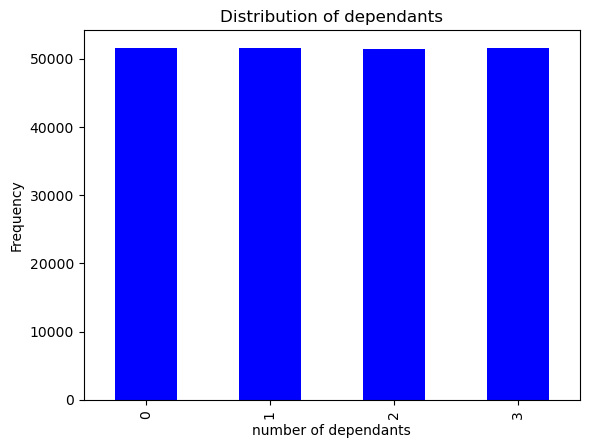

In [39]:
# Visualization of distribution
customers['n_dependants'].value_counts(dropna=True).sort_index().plot.bar(color=['blue'], ylabel='Frequency', 
                                xlabel='number of dependants')
plt.title('Distribution of dependants')

##### Observations for n_dependants
range of 'number of dependants' between 0 and 3

equal distribution between these 4 values

no missing values

#### fam_status

In [40]:
# family status value counts
customers['fam_status'].value_counts(dropna=False)

fam_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

Text(0.5, 1.0, 'fam_status Distribution of our customers')

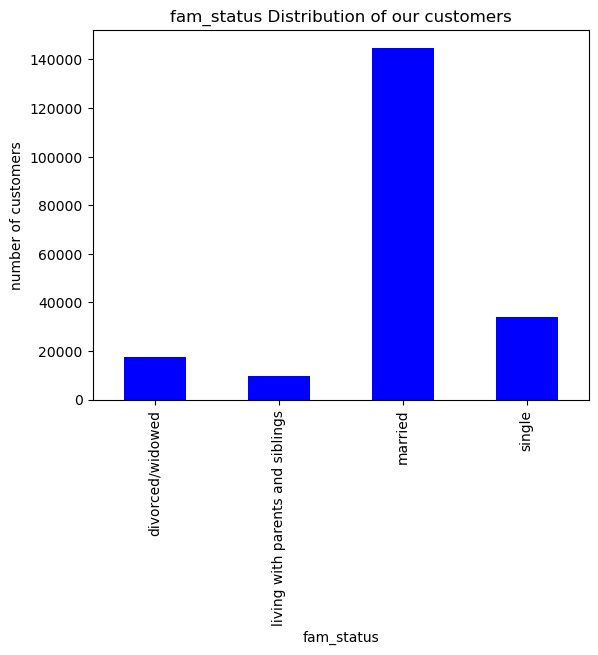

In [41]:
# Visualization of distribution of family status

customers['fam_status'].value_counts(dropna=True).sort_index().plot.bar(color=['blue'], ylabel='number of customers', 
                                xlabel='fam_status')
plt.title('fam_status Distribution of our customers')

##### Observations for fam_status
most customers are married
no missing values

#### income

In [42]:
# Checking key figures
customers['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

<Axes: ylabel='Frequency'>

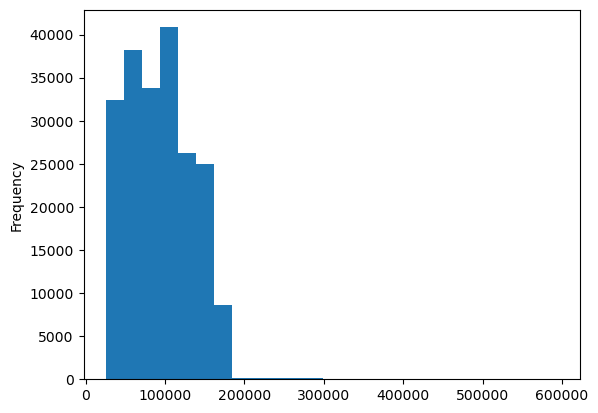

In [43]:
# Checking the distribution of customers income
bins = [100000,200000,300000,400000, 500000]
customers['income'].plot.hist(bins=25)

##### Observations on income
incomes between 25903 and 593901 with an mean of 94632.85

distribution is right skewed

no missing values

### Checking for duplicates

In [44]:
# Duplicates check
dups = customers[customers.duplicated()]
dups.shape

(0, 10)

##### observations on duplicates

no duplicates found

## 04 Combine customer data with prepared Instacart data

    Preparation of data for merge
    Merge data frames


### Preparation of data for merge 

In [45]:
# import the orders_products
ords_prods = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_with_flags.pkl')) 
ords_prods.shape

(32404870, 25)

In [57]:
# checking the types of the dataframes
ords_prods.dtypes



product_id                   int32
product_name                object
aisle_id                     int32
department_id                int32
prices                     float64
order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float64
order_hour_of_day          float64
days_since_prior_order     float64
new_customer                object
add_to_cart_order          float64
reordered                  float64
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_hours               object
max_order                  float64
loyalty_flag                object
mean_price                 float64
spendings                   object
frequency_median           float64
order_frequency             object
dtype: object

## Changing data types

In [47]:
# Checking customers data types
customers.dtypes

user_id          int64
first_name      object
last_name       object
gender          object
state           object
age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [48]:
# Transforming the data type of user_id in customers
customers['user_id']= customers['user_id'].astype('float64')

In [49]:
customers.dtypes

user_id         float64
first_name       object
last_name        object
gender           object
state            object
age               int64
date_joined      object
n_dependants      int64
fam_status       object
income            int64
dtype: object

In [50]:
customers['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

### Merge data frames

In [59]:
# merging ords_prods with customers on user_id
ords_prods_customers = ords_prods.merge(customers, on=['user_id'], how = 'inner')

### Checking merged data frame

In [60]:
# Checking head
ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,28.0,6.0,11.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,30.0,6.0,17.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996.0,138.0,1.0,5.0,13.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091.0,138.0,10.0,5.0,14.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689.0,138.0,9.0,6.0,12.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [61]:
# Checking number of merged rows
ords_prods_customers['_merge'].value_counts(dropna=False)

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [62]:
# Checking merged data frames info
ords_prods_customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            object  
 2   aisle_id                int32   
 3   department_id           int32   
 4   prices                  float64 
 5   order_id                float64 
 6   user_id                 float64 
 7   order_number            float64 
 8   orders_day_of_week      float64 
 9   order_hour_of_day       float64 
 10  days_since_prior_order  float64 
 11  new_customer            object  
 12  add_to_cart_order       float64 
 13  reordered               float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_hours           object  
 19  max_order               float64 
 20  loyalty_flag            object  
 21  mean_p

In [63]:
# dropping the _merge column
ords_prods_customers.drop(columns=['_merge'], inplace=True)

## 05 Export merged data frame

In [64]:
# save the merged dataframe as a pickle
ords_prods_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))